<img src="img/vineyard - Copy.jpg" width=800 height=10 />

   
# Regression Model for Wine Quality


## 1. Introduction and Project Aims


<div class="alert alert-success">

This project will look at the physicochemical and sensory variables of red and white wine variants of the Portuguese "Vinho Verde" wine.

It will use the following data to develop a regression model to predict the quality of the wine based on these variables.

 </div>

<div class="alert alert-success">

**Data citation:**
  
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib
    
 </div>

## 2. The Problem


<div class="alert alert-success">

1. Perform any cleaning, feature engineering, and EDA you deem necessary.
2. Addess any missing data.
3. Identify features that can predict quality
4. Train a model on 80% of the data and evaluate its performance on the remaining 20%.
6. Characterise your model. How well does it perform? What are the best estimates of quality?
    
 </div>

### 3. Data Processing and Cleaning

<div class="alert alert-success">
Explore the dataset, and check whether any data cleaning is required
 </div>    

In [35]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import logging
from sklearn import linear_model
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import statsmodels


main_path = Path(r'C:\Users\user\Documents\Data Science Upskilling\Wine Model\Data')
red_wine_data = pd.read_csv(main_path / 'winequality-red.csv', delimiter=';')

<div class="alert alert-success">
Exploring the red wine data set    
 </div>

In [2]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<div class="alert alert-info">As can be seen all the variables in the dataset are numerical and non-null. No data needs to be removed at this stage. Let's check if there are any duplicates in the dataset.

In [4]:
red_wine_data['duplicated_row'] = red_wine_data.duplicated()
red_wine_data.loc[red_wine_data['duplicated_row']==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 1596
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         240 non-null    float64
 1   volatile acidity      240 non-null    float64
 2   citric acid           240 non-null    float64
 3   residual sugar        240 non-null    float64
 4   chlorides             240 non-null    float64
 5   free sulfur dioxide   240 non-null    float64
 6   total sulfur dioxide  240 non-null    float64
 7   density               240 non-null    float64
 8   pH                    240 non-null    float64
 9   sulphates             240 non-null    float64
 10  alcohol               240 non-null    float64
 11  quality               240 non-null    int64  
 12  duplicated_row        240 non-null    bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 24.6 KB


<div class="alert alert-info">
    As we can see there are 224 duplicated rows. As there is no unique id in the dataset, it is not clear whether these duplicates are by chance and are unique observations or not. For now we will keep them

In [5]:
cleaned_red_wine_data = red_wine_data
cleaned_red_wine_data = cleaned_red_wine_data.drop(columns='duplicated_row')

### 4. EDA

<div class="alert alert-success">
    Let's look at the distribution of the variables.

<function matplotlib.pyplot.show(close=None, block=None)>

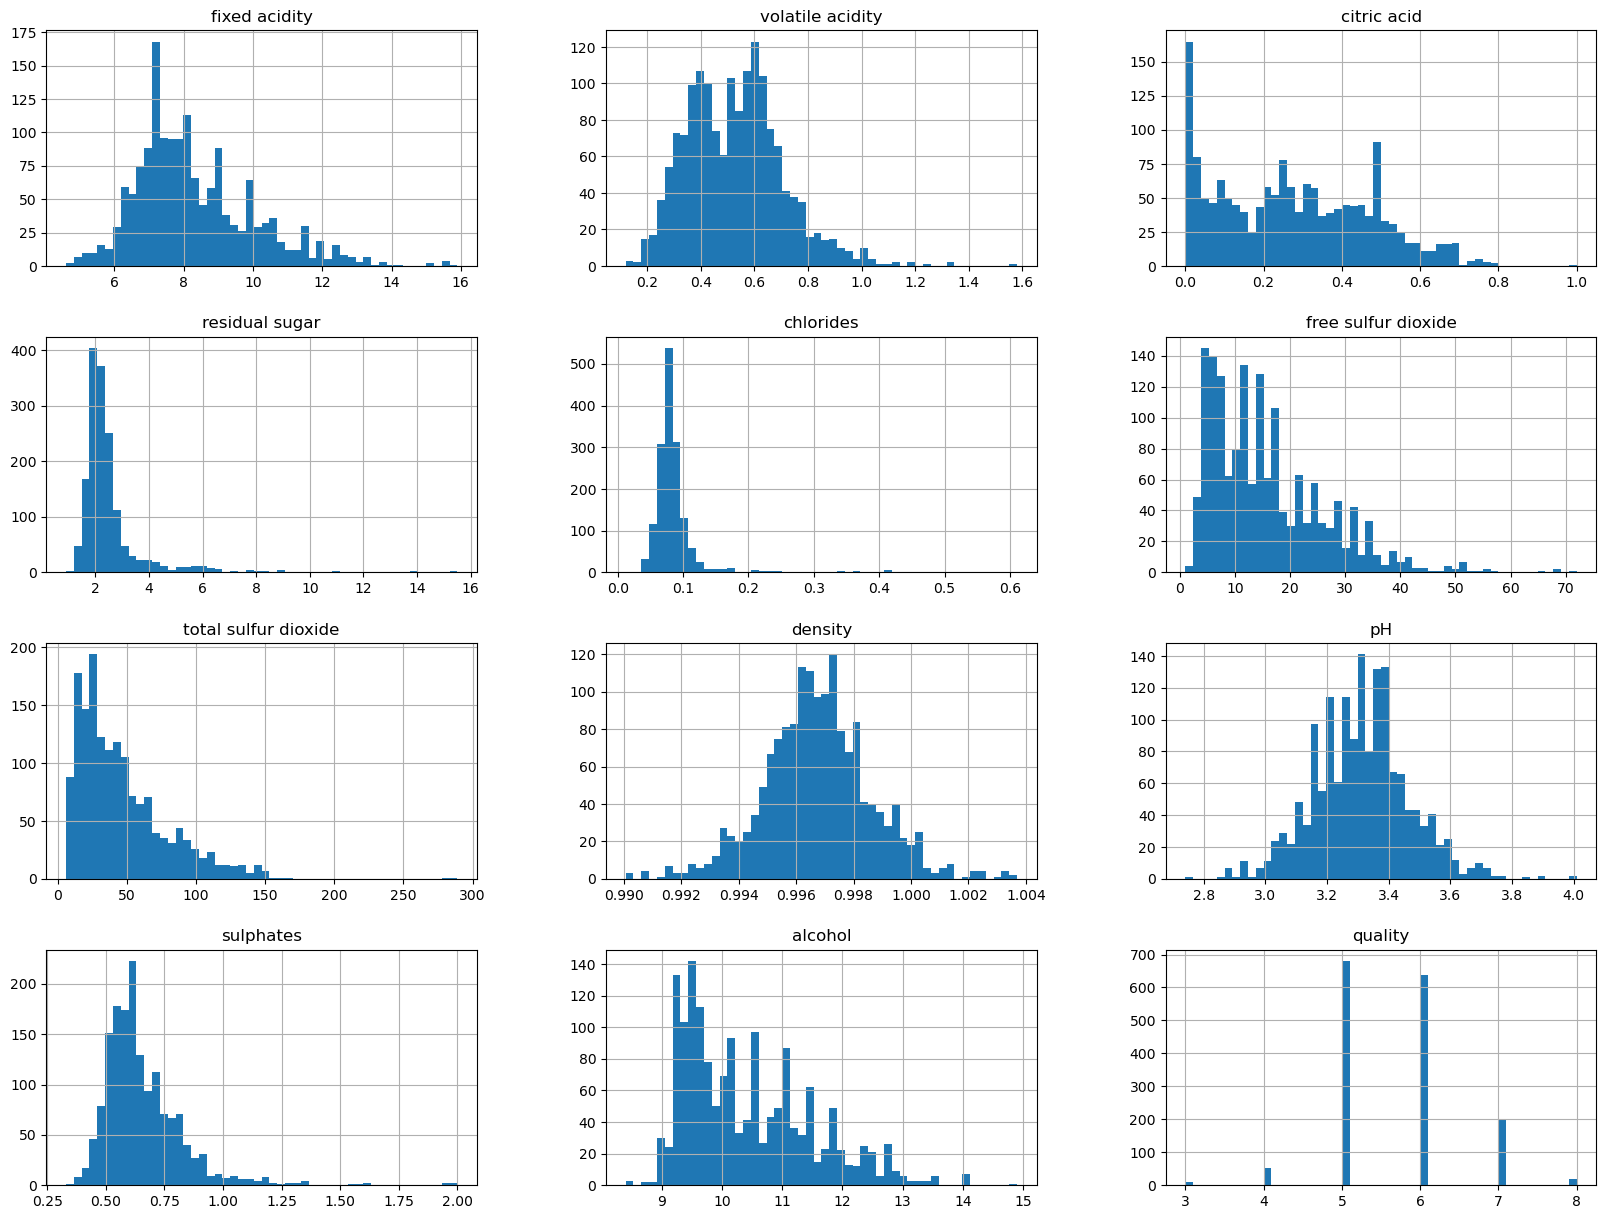

In [6]:
cleaned_red_wine_data.hist(bins=50, figsize=(20,15))
plt.show

<div class="alert alert-info">
    
## Obsevations

### Distribution of Data
Looking at the distributions of the variables it can be seen that a number of them are tail heavy, or not normally distributed. These variables may need to be scaled (by taking the log) to get a normal distribution and allow for logistically regression method to be used. 

### Dependent Variables
The quality variable is our dependent variable here, looks like it only ranges from 3-8 and doesn't have an even split across the range. When creating the train test split of the data may need to look at stratified samples so that the model can be trained across the full range of data quality. The variable may also need to be aggregated to 2 categories rather than the 6 that currently exist to ensure there is sufficiecnt sample size. If the data isn't aggregated then the uneven distribution within the range may result in the model being better at predicting wines of quality 5/6.</div>

<div class="alert alert-warning">
    
### Next Step

The next step is check whether there is any correlation within the independent variables. If there is high correlation (> 0.7) between variables this may result in a model that is unstable (shows very different results due to small changes in the data), and also one that is harder to interpret. This makes it harder to decide which variables are more significant. May result in overfitting of the data. Let's see if any of the variables are correlated with each other.
    </div>

In [7]:
corr_matrix = cleaned_red_wine_data.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<div class="alert alert-success">
    Can see clearly that the alcohol content of the wine is strongly correlated to the quality, as is the volatie acidity. Let's see a matrix of the correlation across all the other variables

<AxesSubplot:>

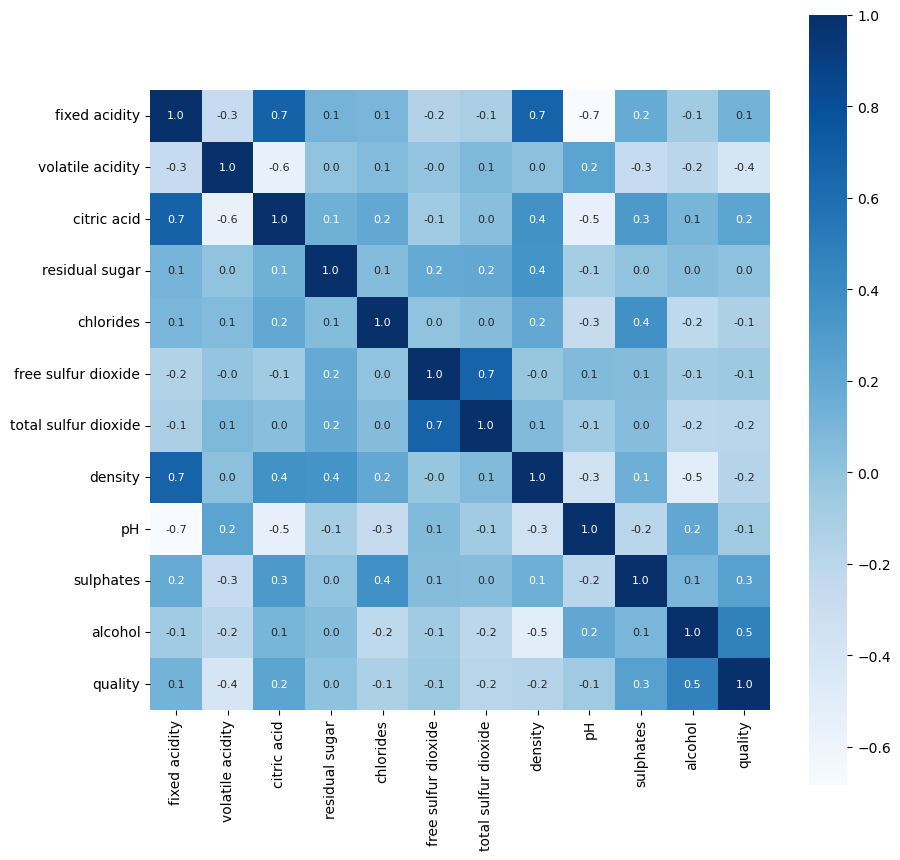

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<div class="alert alert-info">

## Observations

From looking at the correlation matrix above, can see that there are a number of variables which are highly correlated with each other.
    
These are:
1. fixed acidity/volatile acidity & citric acid
2. fixed acidity/volatile acidity & density
3. fixed acidity/volatile acidity & pH
2. fixed acidity/volatile acidity & density
4. free sulfur dioxide & total sulfur dioxide
    
High correlation between the above variables make sense at a chemical level.
Also worth noting that the quality variable is not highly correlated with any of the independent variables. Alcohol content, sulphates and volatile acidity show the strongest correlation.
    
The high correlation between independent variables as mentioned previously may cause issues with the model if not addressed.
</div>

<div class="alert alert-warning">
    
### Next Step
Ways that could be used to address collinearity include removing the variables that are cause the collinerity, recode the variables such that one is x1 and the other is x2/x1, standardize the variables or by using a different regression method such as Ridge or Lasso.

Standardizing the data this will remove any issues of scale differences between the variables, and will help to address the collinearity.

## Standardizing the data

<div class="alert alert-success">
    Let's see if there are any outliers when comparing the independent variables against the dependent variable

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

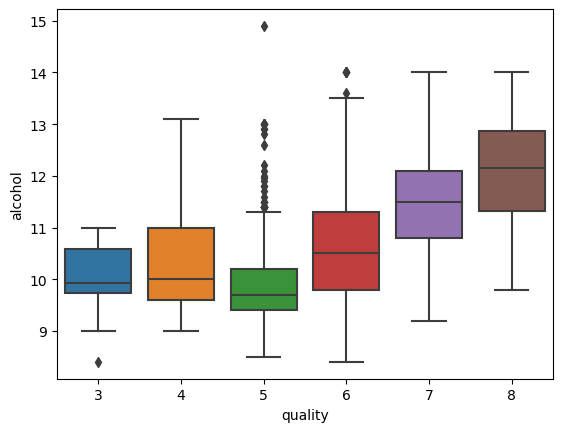

In [9]:
# Quality vs alcohol
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='alcohol')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

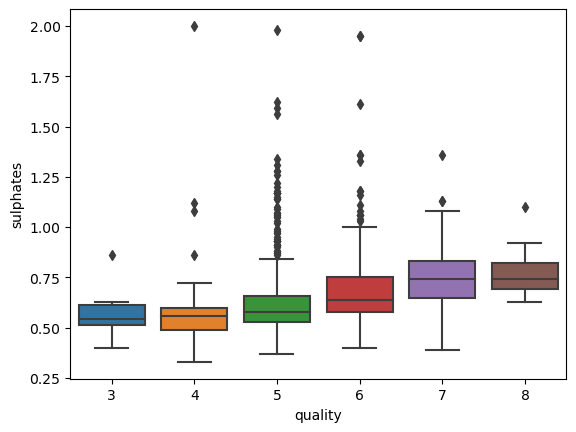

In [10]:
# Quality vs sulphates
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='sulphates')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

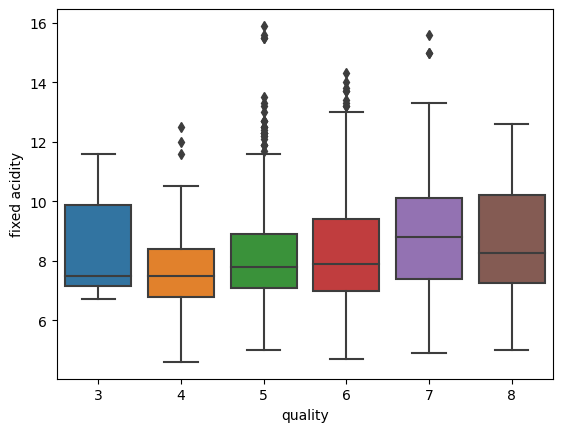

In [11]:
# Quality vs fixed acidity
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='fixed acidity')

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

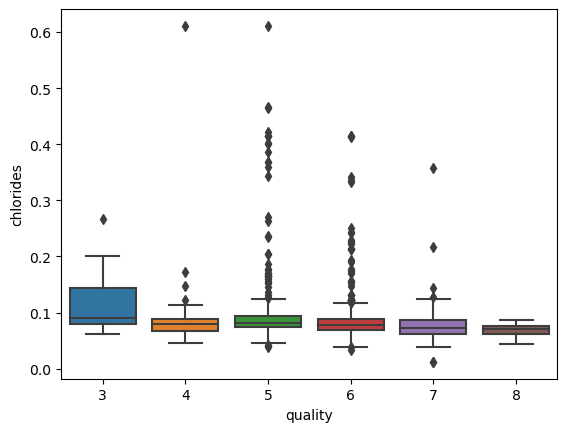

In [12]:
# Quality vs chlorides
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='chlorides')

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

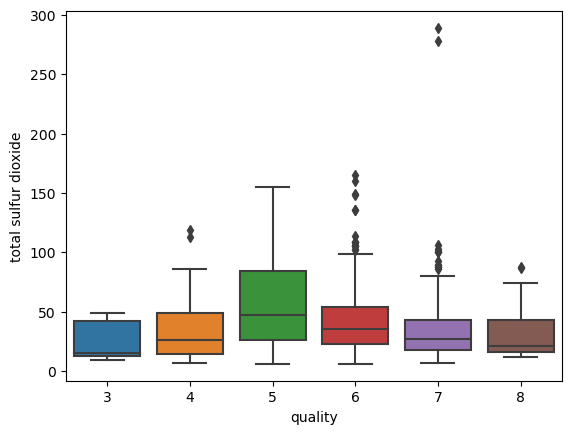

In [13]:
# Quality vs total sulfur dioxide
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='total sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

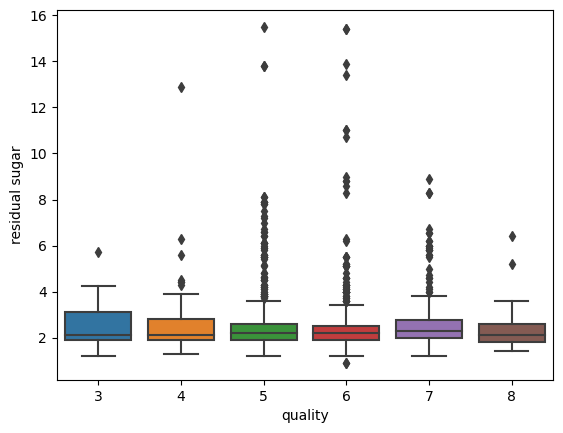

In [14]:
# Quality vs residual sugar
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='residual sugar')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

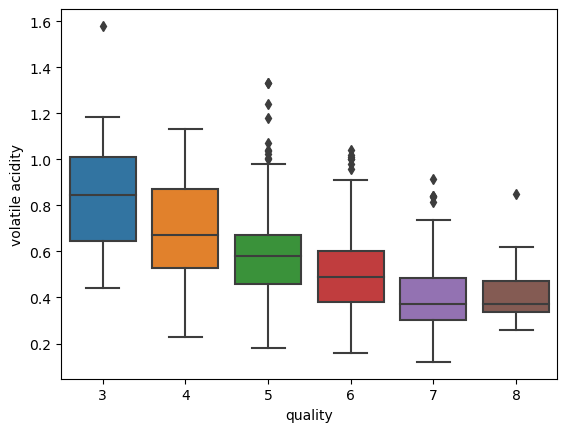

In [15]:
# Quality vs volatile acidity 
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

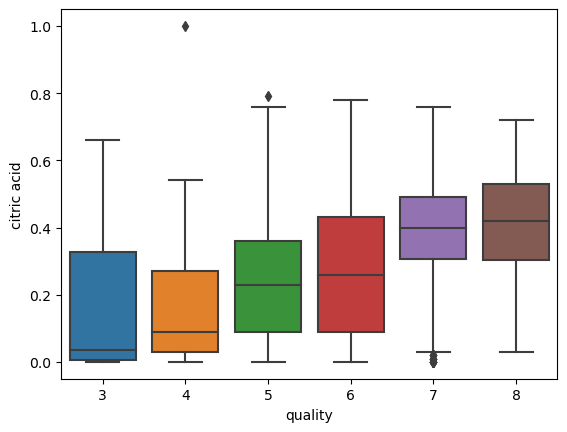

In [16]:
# Quality vs citric acid  
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='citric acid')

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

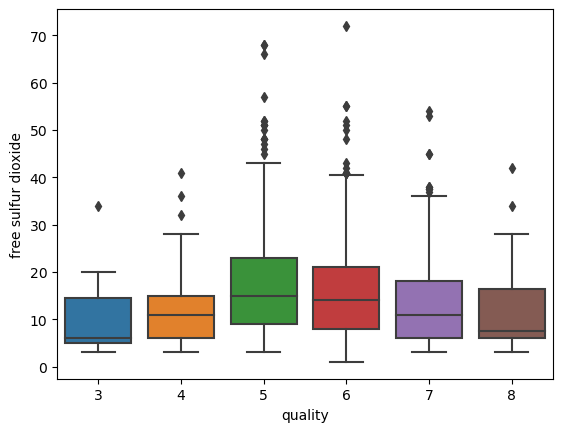

In [17]:
# Quality vs free sulfur dioxide
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='free sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='pH'>

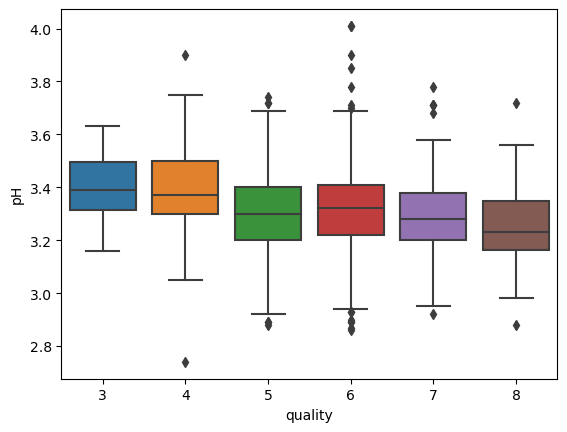

In [18]:
# Quality vs pH
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='pH')

<AxesSubplot:xlabel='quality', ylabel='density'>

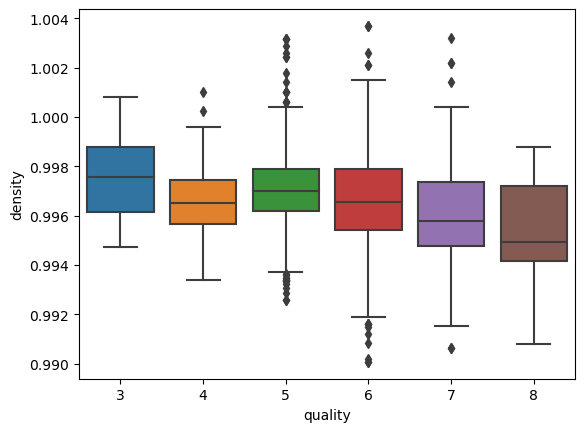

In [19]:
# Quality vs density
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='density')

<div class="alert alert-info">

## Observations

The above graphs of the independent variables against quality the dependent variable can be used to observe whether there are any outliers in the data.
It can be seen that a number of the variables do show outliers. In particular total and free sulfur dioxide, residual sugar, and chlorides.
    
The data as a consequence may need to undergo cleaning/outlier removal to deal with these outliers. Alternatively as this may reduce sample size and outliers may be true data observations a standardizier may also be used. But need to choose one that is capable of dealing with outliers.
    
Otherwise could use IQR method to remove outliers as the data isn't normally distributed.
</div>

<div class="alert alert-warning">

# Next Step
## Power Transformer
For this project will use sklearn's PowerTransformer to transform the data. This method a power transformer to the data such that each variable is more Gaussian-like this will stabilize variance and minimize skewness. These methods are not as impacted by outliers as other scalers are.

The data are strictly positive in this project so will use the Box-Cox PowerTransformer method will be used.
</div>

<div class="alert alert-success">The below code defines the PowerTransformer, fits the data to determine the lambda parameters via maximum likelihood estimation, and then applies the lamdbas transformer values to the data. The lamdba parameter is there to minimise skewness.

In [33]:
pt = PowerTransformer()
x_data = cleaned_red_wine_data.drop(columns=['quality'])
pt.fit(x_data)
transformed_x_data = pt.transform(x_data)
x_names = pt.get_feature_names_out()

<div class="alert alert-success">
    Let's check the distribution of the independent variables now.

<function matplotlib.pyplot.show(close=None, block=None)>

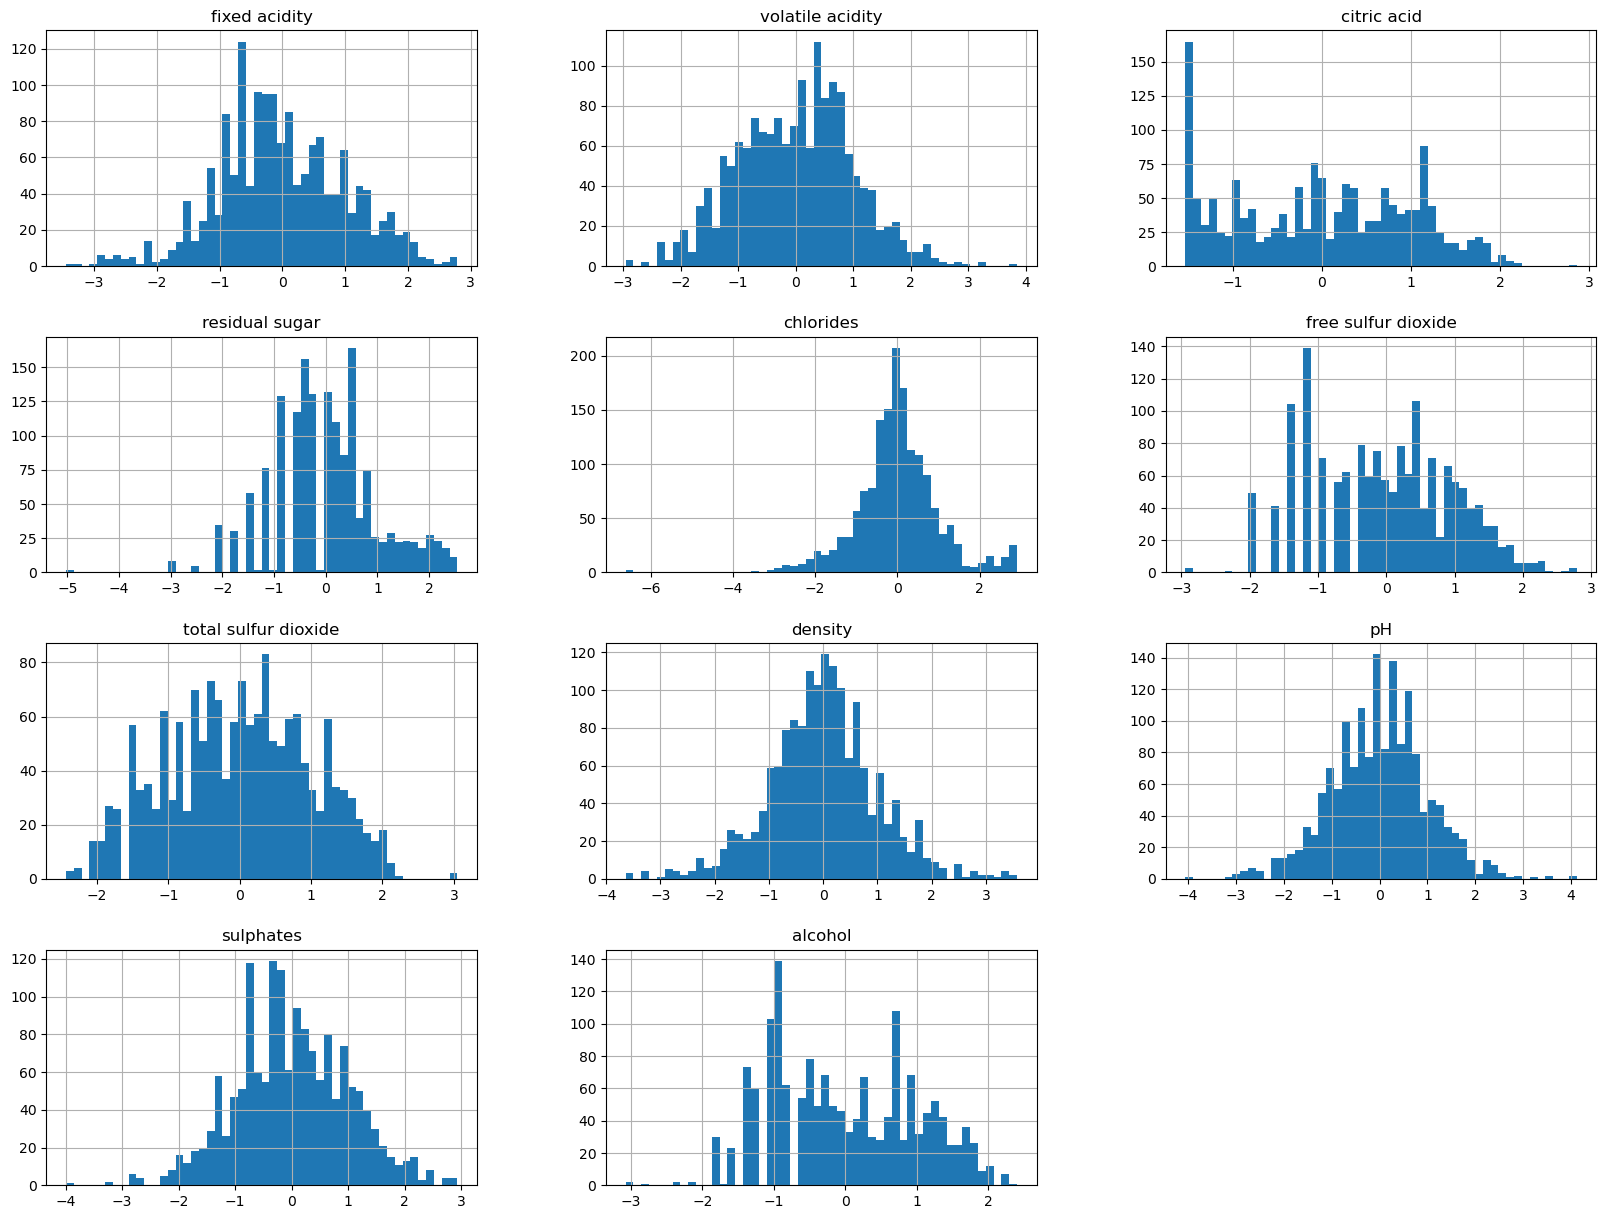

In [21]:
transformed_x_data = pd.DataFrame(data=transformed_x_data)
transformed_x_data.columns = x_names
transformed_x_data.hist(bins=50, figsize=(20,15))
plt.show

<div class="alert alert-info">

## Observations
    
Can see from the above graphs that the independent variables are now more normally distributed and all have similar scales.  This will help the performance of the models to come.
    
But noting that the alcohol data has not got a very normal distribution and this variable showed one fo the stronger correlations with the quality variable.
    
</div>

<div class="alert alert-warning">

# Next Step
## Aggregation of the dependent variable
The next step is to aggregate the dependent variable such that the categories have balanced sample sizes. Depending on the breakdwon this may be 2/3 categories.
    
</div>

In [22]:
cleaned_red_wine_data.groupby('quality')[['quality']].count()

,quality
quality,
3,10
4,53
5,681
6,638
7,199
8,18


In [23]:
cleaned_red_wine_data['quality_aggregated'] = 2
cleaned_red_wine_data.loc[(cleaned_red_wine_data['quality'] == 3) | (cleaned_red_wine_data['quality'] == 4), 'quality_aggregated'] = 1
cleaned_red_wine_data.loc[(cleaned_red_wine_data['quality'] == 7) | (cleaned_red_wine_data['quality'] == 8), 'quality_aggregated'] = 3
cleaned_red_wine_data.groupby('quality_aggregated')[['quality']].count()

,quality
quality_aggregated,
1,63
2,1319
3,217


<div class="alert alert-success">
    I think 3 categories is still too uneven in the sample size, so will aggregate to 2 categories

In [24]:
cleaned_red_wine_data['quality_aggregated'] = 1
cleaned_red_wine_data.loc[(cleaned_red_wine_data['quality'] == 6) | (cleaned_red_wine_data['quality'] == 7) | (cleaned_red_wine_data['quality'] == 8), 'quality_aggregated'] = 23
cleaned_red_wine_data.groupby('quality_aggregated')[['quality']].count()

,quality
quality_aggregated,
1,744
23,855


<div class="alert alert-info">

## Observations
    
First tried to generate 3 categories but the sample size was still too unbalanced so switched to 2 categories, these will represent good/bad wine quality. As the data is no longer representing a range of quality scores, but rather a 'good' or 'bad' category a regression may no longer be the best model form. It may now be a classification task.
    
</div>

<div class="alert alert-warning">

# Next Step
## Model Preparation
    
The next step is to set up a number of different model forms that I want to test. Then test the performance of the different model forms.

    
__Model Forms__

1. Linear Regression
2. Ridge Regression
3. Linear SVC
    
</div>

### 1. Linear Regression

<div class="alert alert-success">
    Split the data into training and test sets

In [25]:
train_model_1, test_model_1 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)

<div class="alert alert-success">
    Check sample size of each wine category in the test/train datasets

In [26]:
train_model_1, test_model_1 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)

In [27]:
red_wine_modelling_data = train_model_1.drop(columns=['quality_aggregated', 'quality']).to_numpy()
red_wine_labels = train_model_1[['quality_aggregated']].to_numpy()

<div class="alert alert-success">
    Create the model

In [28]:
lin_reg = linear_model.LinearRegression(fit_intercept=True).fit(red_wine_modelling_data, red_wine_labels)
lin_reg.score(red_wine_modelling_data, red_wine_labels)

0.2974889781104716

<div class="alert alert-success">
    Now let's test it's performance

In [29]:
quality_predictions = lin_reg.predict(test_model_1.drop(columns=['quality_aggregated', 'quality']).to_numpy())

lin_mse = mean_squared_error(test_model_1[['quality_aggregated']].to_numpy(), quality_predictions)
lin_rmse = np.sqrt(lin_mse)
r_score = r2_score(test_model_1[['quality_aggregated']].to_numpy(), quality_predictions)

print(f'R^2 score: {r_score}')
print(f'RMSE score: {lin_rmse}')

R^2 score: 0.2848888260533772
RMSE score: 9.236247380455154


<div class="alert alert-success"> 
    Can see from the above RMSE the model isn't doing badly, but the R^2 is low.

### 2. Ridge Regression

In [30]:
train_model_2, test_model_2 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)
red_wine_modelling_data = train_model_2.drop(columns=['quality', 'quality_aggregated']).to_numpy()
red_wine_labels = train_model_2[['quality_aggregated']].to_numpy()

ridge_test = Ridge(alpha=0.10)
ridge_test.fit(red_wine_modelling_data, red_wine_labels)
ridge_test.score(red_wine_modelling_data, red_wine_labels)

0.2974563590162653

<div class="alert alert-success"> 
    The model definitely performs better than the normal linear regression but the R^2 is still low. Let's try a completely different model form. Maybe the data is better reflected as a classifier.

### 3. Linear Support Vector Classification (SVC)

In [34]:
train_model_3, test_model_3 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)
red_wine_modelling_data = train_model_3.drop(columns=['quality', 'quality_aggregated']).to_numpy()
red_wine_labels = train_model_3[['quality_aggregated']].to_numpy().ravel()

lin_svm = LinearSVC(random_state=0, tol=1e-5, max_iter=5000, C=1.2, dual=False)
lin_svm.fit(red_wine_modelling_data, red_wine_labels)
lin_svm.score(red_wine_modelling_data, red_wine_labels)

0.7537138389366693

3. Find ways to measure model performance

### 4. K Nearest Neighbours

In [43]:
train_model_4, test_model_4 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)
red_wine_modelling_data = train_model_4.drop(columns=['quality', 'quality_aggregated']).to_numpy()
red_wine_labels = train_model_4[['quality_aggregated']].to_numpy().ravel()

neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform')
neigh.fit(red_wine_modelling_data, red_wine_labels)
neigh.score(red_wine_modelling_data, red_wine_labels)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7740422204847537